### Practice Programming

1. Define a function `ConfusionMatrix(y,y_hat)` for binary classification and return a matrix in the following format: `[[TN,FP],[FN,TP]]`
 
  1. Inputs:  y: 1 x n, y_hat: 1 x n 
  2. Output: 2D numpy array.

In [1]:
import numpy as np
def ConfusionMatrix(y_hat,y):
    TP = np.where((y == 1) & (y_hat == 1), 1, 0).sum()
    TN = np.where((y == 0) & (y_hat == 0), 1, 0).sum()
    FN = np.where((y == 1) & (y_hat == 0), 1, 0).sum()
    FP = np.where((y == 0) & (y_hat == 1), 1, 0).sum()

    return np.array([[TN, FP],[FN, TP]])

2. Define a function `is_binary(y)` to check whether the label vector y belongs to binary classification or not. If the labels are binary then return True (i.e., state=True (Boolean))  else return False (i.e., state = False).

All elements in y are integer numbers (not the datatype).

In [2]:
import numpy as np
def is_binary(y):
    if len(np.unique(y)) == 2:
        state = True
    else:
        state = False

    return state

3. Write a function `percep_loss(X,w,y,i)` to compute the perceptron loss for all 
the sample in $X$ and return the loss for individual samples in a vector.

In [3]:
import numpy as np
def percep_loss(x,w,y):
    z = x @ w
    y_predict = np.where (z >= 0, 1, -1)
    
    samplewise_loss = np.maximum(-1 * y_predict * y, np.zeros(y.shape[0]))
    return samplewise_loss

### Graded Programming

1. Write a function OneHotEncode(y) to convert integer labels to one hot-encoded labels.

In [4]:
lpsruw qxpsb dv qs
ghi OqhHrwEqfrgh(b):
  # Wulwh brxu frgh khuh
  qxp_fodvvhv = qs.pda(b) + 1
  hqfrghu = qs.hbh(qxp_fodvvhv)
  uhwxuq hqfrghu[b]

SyntaxError: invalid syntax (<ipython-input-4-efa3239ba51b>, line 1)

Implement the perceptron weight update rule. Name the function as `update(x,w,y,epoch)` to update the weight vector over n epochs and returns the history of the weight updates as a matrix (or a vector if there is only one feature). 
* The row represents the weight values at ith epoch. The zeroth row represents the weight value at epoch zero (that is the one directly passed an argument to the function).

[Note: Keep learning rate alpha as 1.0]

In [5]:
def predict(X, w):
    z = X @ w
    return np.where (z >= 0, 1, -1)

def update(x,w,y,epochs):
    #print(x.shape, w.shape, y.shape)
    history = []
    for i in np.arange(0, epochs):
        for xi, target in zip(x, y):
            #print(f'{i}. x is {xi.shape}, target is {target} and of shape {target.shape}')
            w += (target - predict(xi, w)) * xi
        history.append(w)
    return np.array(history)

In [6]:
#Testing it
x = np.linspace(1,10,100).reshape(50,2)
w = np.array([-0.44712856,  1.2245077])
y = np.concatenate(((np.zeros(25) - 1), np.ones(25)))
print(update(x, w, y, 100))

[[ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599 -15.50276503]
 [ 38.09832599

3. Implement a function with a name `is_linearly_separable()` that takes in data matrix with a dummy feature (X) and label vector (y). The function returns True if the datapoints are linearly separable, False otherwise.

Note: The maximum number of epochs should not exceed 10.

In [7]:
class Perceptron(object):
    def __init__(self):
        pass
    
    def predict(self, X):
        z = X @ self.w
        return np.where (z >= 0, 1, -1)
    
    def train(self, X, y, num_epochs, lr=0.001):
        self.w = np.linalg.solve(X.T @ X + lr * np.eye(X.shape[-1]), X.T@y)
        self.w_all = []
        for i in np.arange(0, num_epochs):
            for xi, target in zip(X, y):
                self.w += lr * (target - self.predict(xi)) * xi
            self.w_all.append(self.w)
        return self.w_all

In [8]:
def is_linearly_separable(X,y):
  # write your code here
    p = Perceptron()
    w_all = p.train(X, y, num_epochs=10)
    return np.allclose(w_all[-1], w_all[-2])

### Practice (Theory)

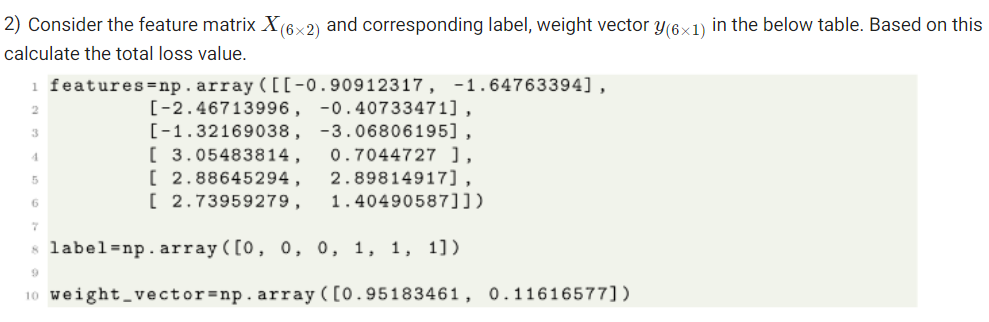

In [9]:
features = np.array([[-0.909,-1.647],[-2.467,-0.407],[-1.321,-3.068],[3.054,0.704],[2.886,2.898],[2.739,1.404]])
label = np.array([0,0,0,1,1,1])
weight_vector = np.array([0.952,0.116])

In [10]:
def predict(X,w):
    z = X @ w
    return np.where (z >= 0, 1, -1)

def loss(X,y, w):
    y_predict = predict(X,w)
    print(y_predict)
    return np.sum(np.maximum(-1 * y_predict * y, np.zeros(y.shape[0])))

loss(features, label, weight_vector)


[-1 -1 -1  1  1  1]


0.0

### Graded (Theory)

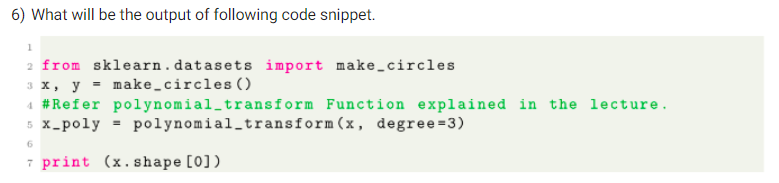

In [11]:
import itertools
import functools

In [12]:
def combinations(x, degree):
    return itertools.combinations_with_replacement(x, degree)

In [13]:
def compute_new_features(items):
    return functools.reduce(lambda x, y: x * y, items)

In [14]:
def polynomial_transform(x, degree):
    if x.ndim == 1:
        x = x[:, None]

    features = [np.ones(len(x))] #a list of np-arrays with all 1.

    for degree in range(1, degree + 1):
        for item in combinations(x.T, degree):
            features.append(compute_new_features(item))
            
    return np.asarray(features).T

In [15]:
from sklearn.datasets import make_circles
x, y = make_circles()
x = polynomial_transform(x, 3)
x.shape[0], x.shape[1]

D:\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


(100, 10)